<a href="https://colab.research.google.com/github/Hemanthbola/COMP-SCI-5530-Assignment-1/blob/main/Question_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Necessary libraries

In [1]:
!pip install pandas matplotlib seaborn

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from google.colab import files

Loading the data set

In [3]:
uploaded = files.upload()


Saving StudentsPerformance.csv to StudentsPerformance.csv


In [4]:
df_perf = pd.read_csv(list(uploaded.keys())[0])

In [23]:
df_perf_encoded = df_perf.copy()
for col in df_perf_encoded.select_dtypes(include=['object']).columns:
    df_perf_encoded[col] = df_perf_encoded[col].astype('category').cat.codes

Creating Folder Structure

In [5]:
performance_dir = "student_performance_analysis"
os.makedirs(performance_dir, exist_ok=True)

subfolders = ["1_raw_data", "2_cleaned_data", "3_visualizations"]
for folder in subfolders:
    os.makedirs(os.path.join(performance_dir, folder), exist_ok=True)

In [6]:
raw_perf_data_path = os.path.join(performance_dir, "1_raw_data/student_performance.csv")
df_perf.to_csv(raw_perf_data_path, index=False)

Data Cleaning

In [7]:
cleaned_perf_data_path = os.path.join(performance_dir, "2_cleaned_data/student_performance_cleaned.csv")
df_perf.to_csv(cleaned_perf_data_path, index=False)

Data Visualization 1: Distribution of Grades

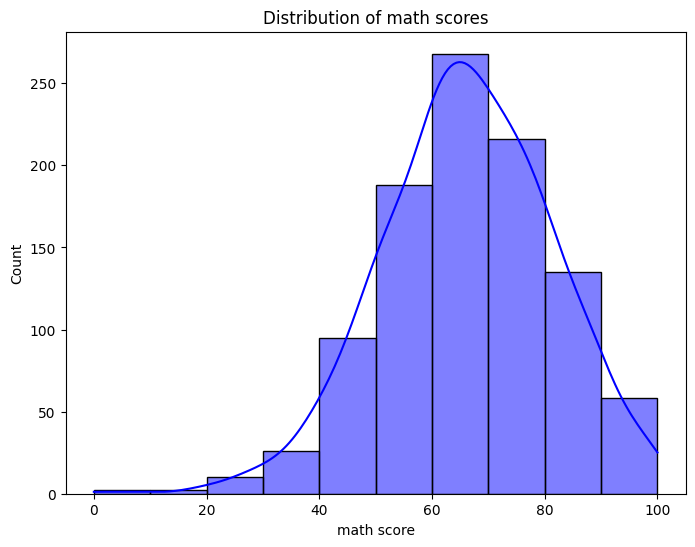

In [10]:
plt.figure(figsize=(8,6))
sns.histplot(df_perf["math score"], bins=10, kde=True, color="blue")
plt.xlabel("math score")
plt.ylabel("Count")
plt.title("Distribution of math scores")
plt.savefig(os.path.join(performance_dir, "3_visualizations/math_score.png"))
plt.show()

Data Visualization 2: Gender Based Performance

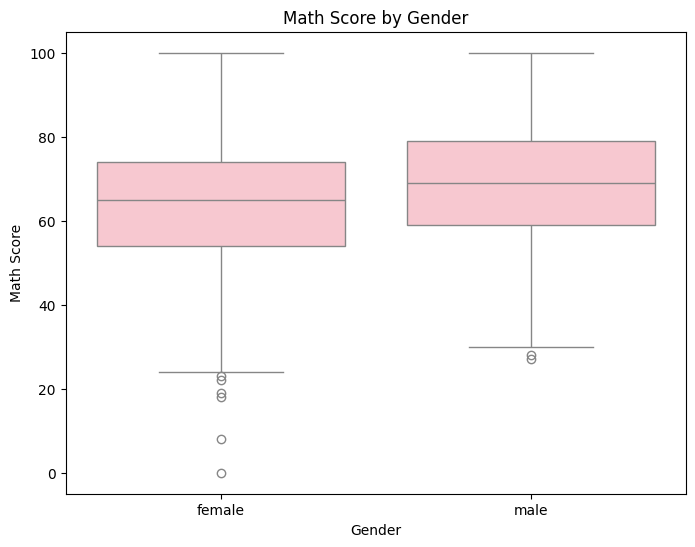

In [17]:
plt.figure(figsize=(8,6))
sns.boxplot(x=df_perf["gender"], y=df_perf["math score"], color="pink")
plt.xlabel("Gender")
plt.ylabel("Math Score")
plt.title("Math Score by Gender")
plt.savefig(os.path.join(performance_dir, "3_visualizations/gender_performance.png"))
plt.show()


Data Visualization 3: Correlation Heat map

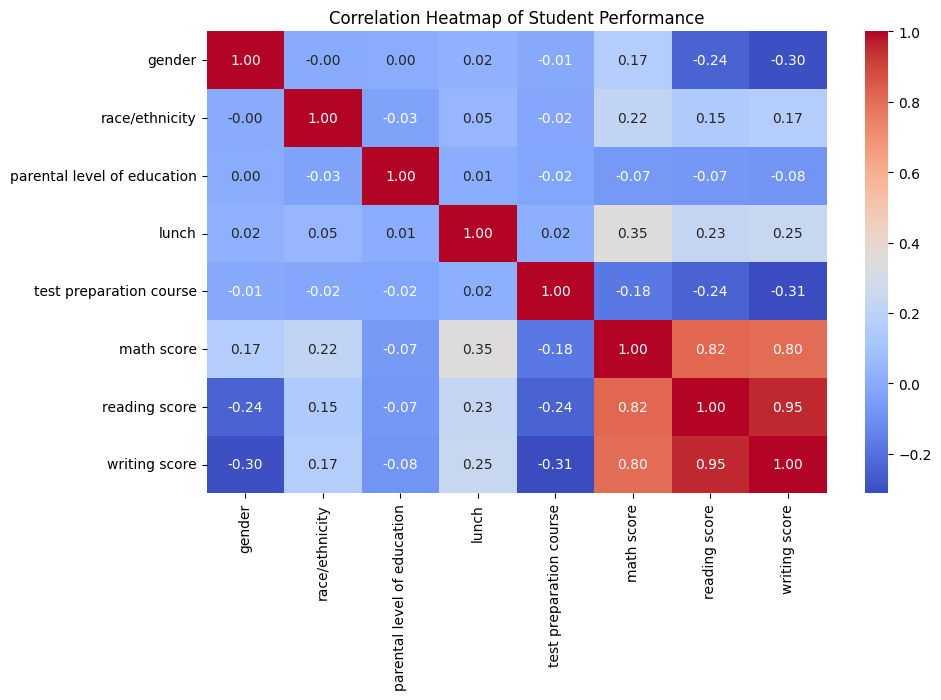

In [24]:
plt.figure(figsize=(10,6))
sns.heatmap(df_perf_encoded.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Student Performance")
plt.savefig(os.path.join(performance_dir, "3_visualizations/correlation_heatmap.png"))
plt.show()

Data Visualization 4: Parental level education Vs Reading Score

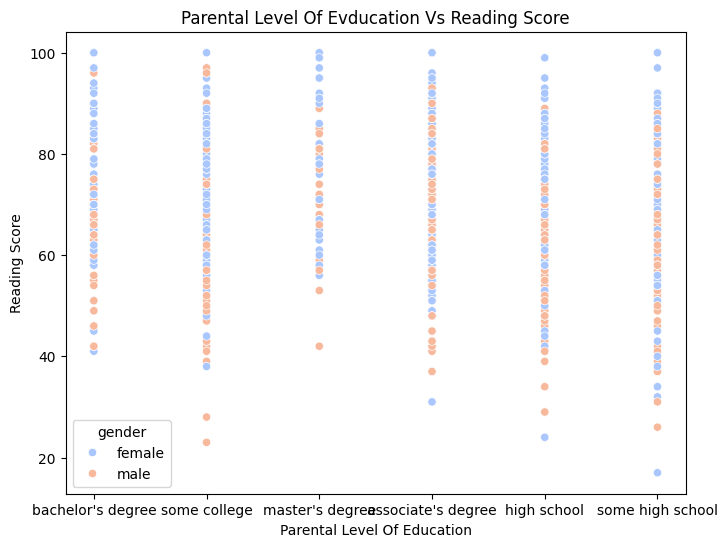

In [29]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=df_perf["parental level of education"], y=df_perf["reading score"], hue=df_perf["gender"], palette="coolwarm")
plt.xlabel("Parental Level Of Education")
plt.ylabel("Reading Score")
plt.title("Parental Level Of Evducation Vs Reading Score")
plt.savefig(os.path.join(performance_dir, "3_visualizations/POE Vs RS.png"))
plt.show()

Data Visualization 5: Parental level of education impact on writing scores



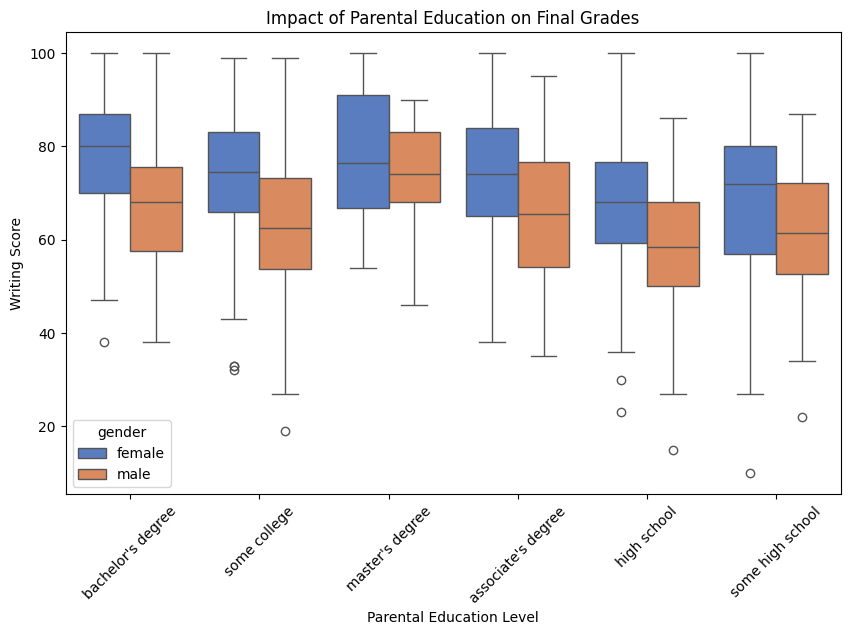

In [32]:
plt.figure(figsize=(10,6))
sns.boxplot(x=df_perf["parental level of education"], y=df_perf["writing score"],hue=df_perf["gender"], palette="muted")
plt.xlabel("Parental Education Level")
plt.ylabel("Writing Score")
plt.title("Impact of Parental Education on Writing Score")
plt.xticks(rotation=45)
plt.savefig(os.path.join(performance_dir, "3_visualizations/parental_education.png"))
plt.show()

Simple explanation of how each visualization helps in analyzing the student performance dataset:

Grade Distribution (Histogram) – Helps us understand how students' final grades are distributed, showing whether most students perform well or struggle.
Gender-Based Performance (Boxplot) – Makes it easy to compare final grades between male and female students, identifying any significant differences.
Correlation Heatmap – Reveals relationships between different factors (like study time, parental education, etc.), helping to identify what influences student performance the most.
Study Time vs Final Grade (Scatter Plot) – Shows the impact of study hours on grades, helping to understand if more study time leads to better performance.
Parental Education Impact on Grades (Boxplot) – Highlights how a parent's education level affects a student’s performance, revealing trends in academic support.
These visualizations simplify complex data, making patterns and key insights easier to spot.